## Arshia Yousefi Nezhad
## 610302085

توضیحات کامل خط به خط کد در فایل گزارش موجود است

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
car_df = pd.read_csv("car details v4.csv")
car_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [33]:
# for slit dataset to train and test by stratsfy

# Create price rate column
car_df['price_rate'] =  car_df['Price'].copy()

# divide price column to five parts with quantile concepts
percentiles_numbers = car_df['Price'].quantile([0.2, 0.4, 0.6 , 0.8]).tolist()


def update_rating_col(row):
  if row.price_rate <= percentiles_numbers[0]:
    row.price_rate = 1  # Low Price
  elif percentiles_numbers[0] < row.price_rate <= percentiles_numbers[1]:
    row.price_rate = 2  # Intermidiate Price
  elif percentiles_numbers[1] < row.price_rate <= percentiles_numbers[2]:
    row.price_rate = 3  # UpperIntermidiate Price
  elif percentiles_numbers[2] < row.price_rate <= percentiles_numbers[3]:
    row.price_rate = 4  # expensive
  else:
    row.price_rate = 5 # very expensive

  return row
car_df = car_df.apply(update_rating_col, axis='columns')

In [34]:
# we see categorical number price rate column in dataset
car_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,price_rate
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,2
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,2
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,1
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,3
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,4


In [35]:
from sklearn.model_selection import train_test_split

# splice data to train and test by using stratify on price rate
train_car, test_car = train_test_split(car_df, test_size = 0.2, random_state=42, stratify=car_df.price_rate)

# After Using price rate in column dataset I drop this column because our target column is Price
train_car.drop('price_rate', axis=1, inplace=True)
test_car.drop('price_rate', axis=1, inplace=True)

## Feature Extraction

In [36]:
train_car.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
153,Maruti Suzuki,Ertiga ZDI + SHVS,865000,2016,67000,Diesel,Manual,Navi Mumbai,White,First,Individual,1248 cc,89 bhp @ 4000 rpm,200 Nm @ 1750 rpm,FWD,4296.0,1695.0,1685.0,7.0,45.0
126,Hyundai,Grand i10 Sportz 1.2 Kappa VTVT [2013-2016],375000,2015,87500,Petrol,Manual,Gurgaon,Grey,First,Individual,1197 cc,81 bhp @ 6000 rpm,114 Nm @ 4000 rpm,FWD,3765.0,1660.0,1520.0,5.0,43.0
1669,Hyundai,i10 Sportz 1.2 AT Kappa2,375000,2013,34000,Petrol,Automatic,Mumbai,Red,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
1523,Ford,Endeavour Titanium 3.2 4x4 AT,3650000,2019,34000,Diesel,Automatic,Delhi,Black,First,Individual,3198 cc,197 bhp @ 3000 rpm,470 Nm @ 1750 rpm,AWD,4892.0,1860.0,1837.0,7.0,80.0
1259,Maruti Suzuki,Swift VXi [2014-2017],600000,2018,54000,Petrol,Manual,Mohali,White,First,Individual,1197 cc,83 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3850.0,1695.0,1530.0,5.0,42.0


### categroy value feature extraction for each columns

# Quesion 2 (EDA)

### 1. more familiar with columns data

In [37]:

make_unique_value = train_car['Make'].unique()
print("Number of Make unique values: ", len(make_unique_value))
print("Make Unique values: ",make_unique_value)

print("-"*100)

model_unique_value = train_car['Model'].unique()
print("Number of Model unique values: ", len(model_unique_value))
print("Model Unique values: ",model_unique_value)

print("-"*100)

Fuel_Type_unique_value = train_car['Fuel Type'].unique()
print("Number of Fuel_Type unique values: ", len(Fuel_Type_unique_value))
print("Fuel_Type Unique values: ",Fuel_Type_unique_value)

print("-"*100)

Transmission_unique_value = train_car['Transmission'].unique()
print("Number of Transmission unique values: ", len(Transmission_unique_value))
print("Transmission Unique values: ",Transmission_unique_value)

print("-"*100)

Location_unique_value = train_car['Location'].unique()
print("Number of Location unique values: ", len(Location_unique_value))
# print("Location Unique values: ",Location_unique_value)

print("-"*100)

Seller_Type_unique_value = train_car['Seller Type'].unique()
print("Number of Seller_Type unique values: ", len(Seller_Type_unique_value))
print("Seller_Type Unique values: ",Seller_Type_unique_value)

print("-"*100)

Drivetrain_unique_value = train_car['Drivetrain'].unique()
print("Number of Drivetrain unique values: ", len(Drivetrain_unique_value))
print("Drivetrain Unique values: ",Drivetrain_unique_value)


Number of Make unique values:  33
Make Unique values:  ['Maruti Suzuki' 'Hyundai' 'Ford' 'Honda' 'Skoda' 'Mercedes-Benz' 'Toyota'
 'Jaguar' 'Mahindra' 'Audi' 'Tata' 'BMW' 'Volkswagen' 'Renault' 'MG'
 'Fiat' 'Kia' 'Land Rover' 'Rolls-Royce' 'Lamborghini' 'Porsche' 'Jeep'
 'MINI' 'Datsun' 'Isuzu' 'Nissan' 'Volvo' 'Chevrolet' 'Lexus' 'Ssangyong'
 'Maserati' 'Ferrari' 'Mitsubishi']
----------------------------------------------------------------------------------------------------
Number of Model unique values:  912
Model Unique values:  ['Ertiga ZDI + SHVS' 'Grand i10 Sportz 1.2 Kappa VTVT [2013-2016]'
 'i10 Sportz 1.2 AT Kappa2' 'Endeavour Titanium 3.2 4x4 AT'
 'Swift VXi [2014-2017]' 'Baleno Delta 1.2 AT' 'Celerio VXi AMT'
 'Brio S MT' 'Amaze 1.2 S AT i-VTEC' 'Elantra SX (O) 2.0 AT'
 'Superb L&K TSI AT' 'Venue SX 1.0 Turbo iMT' 'C-Class 220 BlueEfficiency'
 'Fortuner 3.0 4x2 AT' 'E-Class E 200 Avantgarde' 'XE Prestige Diesel'
 'i20 Active 1.2 SX' 'Creta 1.6 SX Plus Special Edition'
 'Ma

### 2. Plot Mean price for each company (Make)

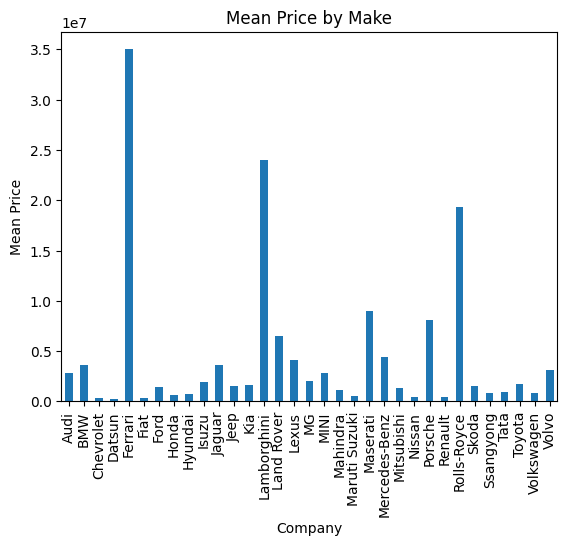

In [38]:
mean_make_prices = train_car.groupby('Make')['Price'].mean()
mean_make_prices.plot(kind='bar')
plt.title('Mean Price by Make')
plt.xlabel('Company')
plt.ylabel('Mean Price')
plt.show()

### 3. Number of products manufactured by car's companies

In [39]:
# count Make and Model data toghter
category_details = train_car[['Make', 'Model']].value_counts()
category_details = category_details.sort_values(ascending=False)
category_details

Make           Model                   
BMW            X1 sDrive20d xLine          13
Maruti Suzuki  Swift VXi [2014-2017]       10
Audi           A6 35 TDI Matrix            10
Maruti Suzuki  Swift DZire VDI             10
Honda          City V                      10
                                           ..
Maserati       Levante Diesel               1
Mercedes-Benz  A-Class A 200d               1
Skoda          Octavia Style 1.8 TSI AT     1
Mercedes-Benz  B-class B180                 1
Volvo          XC90 D5 Inscription          1
Name: count, Length: 912, dtype: int64

# Question 3

Do some preprocess on data
- show number of nan data in dataset (precentage)
- fill nan variable with some methods
    1. Mode
    2. Mean
    3. ffill


### 1. Number of nan data in each columns (show with percentage)

In [40]:
# Calculate the percentage of missing values for each column
(train_car.isnull().mean() * 100).round(2)

Make                  0.00
Model                 0.00
Price                 0.00
Year                  0.00
Kilometer             0.00
Fuel Type             0.00
Transmission          0.00
Location              0.00
Color                 0.00
Owner                 0.00
Seller Type           0.00
Engine                3.10
Max Power             3.10
Max Torque            3.10
Drivetrain            5.89
Length                2.25
Width                 2.25
Height                2.25
Seating Capacity      2.25
Fuel Tank Capacity    4.68
dtype: float64

In [41]:
np.sum(train_car.isnull())

C:\Users\RP.co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                51
Max Power             51
Max Torque            51
Drivetrain            97
Length                37
Width                 37
Height                37
Seating Capacity      37
Fuel Tank Capacity    77
dtype: int64

Delete Drivertrain columns from dataset because it has a lot of nan data

In [42]:
# I drop Drivetrain columns first
# Because after some experience in training data it is not helpfull
# Also it has a lot of missing value
train_car.drop('Drivetrain', axis=1, inplace=True)
test_car.drop('Drivetrain', axis=1, inplace=True)

# Quesion 4

### 1. preprocess on numerical data
1. fill nan data
2. add numerical features

In [43]:
from sklearn.preprocessing import LabelEncoder


def numerical_fill_nan(data):

    num_data = data
    # ------------------------------------------------------------------
    # Grouping by 'Make' and finding the mode of 'Engine' for each group
    mode_engine_by_make =  num_data.groupby('Make')['Engine'].apply(lambda x: x.mode()).reset_index(name='Engine')
    num_data.drop("Engine", axis=1, inplace=True)
    # Merging the mode results back into the original DataFrame
    num_data = num_data.merge(mode_engine_by_make, on='Make', how='left')

    # ------------------------------------------------------------------
    # Calculate the mean of column continues variable in each columns
    mean_length = num_data["Length"].mean()
    mean_width = num_data['Width'].mean()
    mean_height = num_data['Height'].mean()

    num_data.Length.fillna(mean_length, inplace=True)
    num_data.Width.fillna(mean_width, inplace=True)
    num_data.Height.fillna(mean_height, inplace=True)

    # ------------------------------------------------------------------
    # Sort values by "Engine" because Max Power depands on Engine
    num_data.sort_values(by='Engine', ascending=False, inplace=True)
    # fill nan variable with ffill method
    num_data["Max Torque"].fillna(method='ffill', inplace=True)
    num_data["Max Power"].fillna(method='ffill', inplace=True)

    # ------------------------------------------------------------------
    # Sort values by "Width" because Seating Capacity Feature depands on width(Length) of car
    num_data.sort_values(by='Width', ascending=False, inplace=True)
    num_data["Seating Capacity"].fillna(method='ffill', inplace=True)

    # ------------------------------------------------------------------
    # Sort values by "Length" because Fuel Tank Capacity Feature depands on Length(width) of car
    num_data.sort_values(by='Length', ascending=False, inplace=True)
    num_data["Fuel Tank Capacity"].fillna(method='ffill', inplace=True)
    return num_data


def add_numerical_feature(proceed_num_data):

    # as we see, Engine column data are like this '1119 cc' or overal 'number cc'
    # for traing model we need number.
    # this code help remove cc and save thier number in this column like 1119
    proceed_num_data['Engine'] = proceed_num_data['Engine'].map(lambda x: int(x.split(' ')[0]))

    # we create new feature: 'Max_Power_bhp' and 'Max_Power_rpm'
    # because if we have better performance on training we need created this feature
    # after analysis dataset set we have some string data in this columns
    # I split rpm and bhp number in two columns

    proceed_num_data['Max_Power_bhp'] = proceed_num_data['Max Power'].map(lambda x: x.split(' ')[0] if len(x.split(' ')) == 5 else x.split('@')[0])
    proceed_num_data['Max_Power_rpm'] = proceed_num_data['Max Power'].map(lambda x: x.split(' ')[3] if len(x.split(' ')) == 5 else x.split('@')[1])

    # we have some miss value that their size is less than five and I drop this values from dataset (the size of this missing value is )
    # I find them in dataset. we have two missing value (189 bhp, 112 bhp)
    # I remove the row that have this missing value (there are 4 miss value in dataset)
    proceed_num_data.drop(proceed_num_data[(proceed_num_data['Max_Power_bhp'] == '189 bhp ') | (proceed_num_data['Max_Power_bhp'] == '112 bhp ')].index, inplace=True)

    # after that we have some string in our dataset using astype to convert them to int
    proceed_num_data.Max_Power_bhp = proceed_num_data.Max_Power_bhp.astype('float64')
    proceed_num_data.Max_Power_rpm = proceed_num_data.Max_Power_rpm.astype('float64')

    # after feature engineering we dont need old columns like: 'Max Power', 'Max Torque
    # and we drop this columns
    proceed_num_data.drop(['Max Power','Max Torque'], axis=1, inplace=True)
    return proceed_num_data
    

In [44]:
# %%capture
train_data = train_car.copy()
proceed_num_train = numerical_fill_nan(train_data)
proceed_num_train_plus_features = add_numerical_feature(proceed_num_train)


C:\Users\RP.co\AppData\Local\Temp\ipykernel_3612\3328407980.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data["Max Torque"].fillna(method='ffill', inplace=True)
C:\Users\RP.co\AppData\Local\Temp\ipykernel_3612\3328407980.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data["Max Power"].fillna(method='ffill', inplace=True)
C:\Users\RP.co\AppData\Local\Temp\ipykernel_3612\3328407980.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data["Seating Capacity"].fillna(method='ffill', inplace=True)
C:\Users\RP.co\AppData\Local\Temp\ipykernel_3612\3328407980.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_dat

# Question 4

### 1. Correlation Matrix

In [45]:
numerical_df = proceed_num_train_plus_features[['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height','Seating Capacity', 'Engine', 'Max_Power_bhp', 'Max_Power_rpm']]
numerical_df.head()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Engine,Max_Power_bhp,Max_Power_rpm
126,20000000,2011,27000,5569.0,1948.0,1550.0,5.0,6592,570.0,5250.0
622,20000000,2012,55000,5569.0,1948.0,1550.0,5.0,6592,570.0,5250.0
1314,18500000,2021,21000,5462.0,1899.0,1498.0,4.0,2143,463.0,5250.0
1607,11500000,2016,27000,5453.0,1899.0,1498.0,4.0,2143,453.0,5250.0
57,18000000,2011,60000,5399.0,1948.0,1550.0,5.0,6592,570.0,5250.0


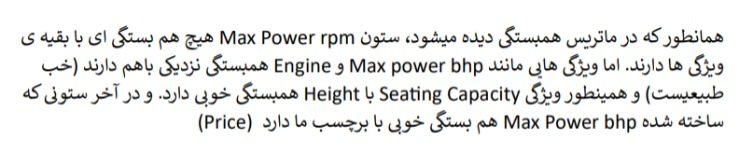

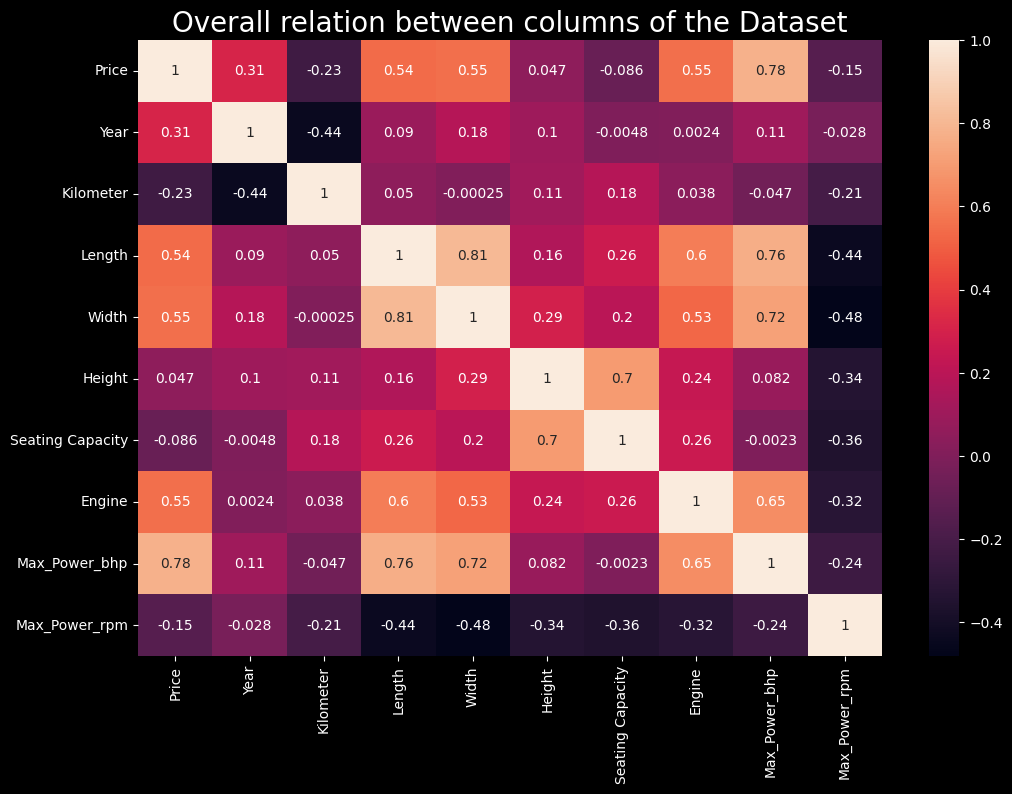

In [47]:
# Show Correlation Matrix on numerical data
import seaborn as sns

plt.style.use('dark_background')

plt.figure(figsize=(12,8))
sns.heatmap(numerical_df.corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Overall relation between columns of the Dataset', fontsize = 20)
plt.show()
# pd.DataFrame(numerical_df.corr())

In [48]:
# drop Max_Power_rpm because it is usefulness in corr matrix
proceed_num_train_plus_features.drop('Max_Power_rpm', axis=1, inplace=True)

# Quesion 5

Fill nan variable for train dataset

In [49]:
label_encoder = LabelEncoder()

proceed_num_cat_train =  proceed_num_train_plus_features.copy()
# preform label Encoding on some categorical feature
proceed_num_cat_train['Make']= label_encoder.fit_transform(proceed_num_cat_train['Make'])
proceed_num_cat_train['Model']= label_encoder.fit_transform(proceed_num_cat_train['Model'])
proceed_num_cat_train['Fuel Type']= label_encoder.fit_transform(proceed_num_cat_train['Fuel Type'])
proceed_num_cat_train['Transmission']= label_encoder.fit_transform(proceed_num_cat_train['Transmission'])
proceed_num_cat_train['Location']= label_encoder.fit_transform(proceed_num_cat_train['Location'])
proceed_num_cat_train['Color']= label_encoder.fit_transform(proceed_num_cat_train['Color'])
proceed_num_cat_train['Owner']= label_encoder.fit_transform(proceed_num_cat_train['Owner'])
proceed_num_cat_train['Seller Type']= label_encoder.fit_transform(proceed_num_cat_train['Seller Type'])
proceed_num_cat_train.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,level_1,Engine,Max_Power_bhp
126,26,434,20000000,2011,27000,6,0,15,2,4,2,5569.0,1948.0,1550.0,5.0,82.5,0,6592,570.0
622,26,434,20000000,2012,55000,6,0,11,14,4,2,5569.0,1948.0,1550.0,5.0,82.5,0,6592,570.0
1314,21,616,18500000,2021,21000,6,0,24,1,1,2,5462.0,1899.0,1498.0,4.0,70.0,0,2143,463.0
1607,21,615,11500000,2016,27000,6,0,15,2,1,2,5453.0,1899.0,1498.0,4.0,70.0,0,2143,453.0
57,26,433,18000000,2011,60000,6,0,45,8,3,1,5399.0,1948.0,1550.0,5.0,82.5,0,6592,570.0


# Quesion 6

In [51]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


X = proceed_num_cat_train.drop('Price', axis=1)
y = proceed_num_cat_train['Price']

# define model evaluation method
# n_splits = number of folds
cv = RepeatedKFold(n_splits=5, random_state=42)

# create ridge regression model
model_ridge = Ridge()

# create Lasso regression model
model_lasso = Lasso()

# define search Gride Search with root mean squared error
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.1)
search_ridge_rmse = GridSearchCV(model_ridge, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
search_lasso_rmse = GridSearchCV(model_lasso, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# perform the search
results_ridge_rmse = search_ridge_rmse.fit(X, y)
results_lasso_rmse = search_lasso_rmse.fit(X, y)

# for ridge regression with RMSE
print("Ridge Regression: ", "-"*10)
print('RMSE: %.3f' % results_ridge_rmse.best_score_)
print('Config: %s' % results_ridge_rmse.best_params_)
print()
# for Lasso regression with RMSE
print("Lasso Regression: ", "-"*10)
print('RMSE: %.3f' % results_lasso_rmse.best_score_)
print('Config: %s' % results_lasso_rmse.best_params_)


# define search Gride Search with R2 Score
search_ridge_r2 = GridSearchCV(model_ridge, grid, scoring='r2', cv=cv, n_jobs=-1)
search_lasso_r2 = GridSearchCV(model_lasso, grid, scoring='r2', cv=cv, n_jobs=-1)

# perform the search
results_ridge_r2 = search_ridge_r2.fit(X, y)
results_lasso_r2 = search_lasso_r2.fit(X, y)
print()
print("#"*15)
print()
# for ridge regression with R2 Score
print("Ridge Regression: ", "-"*10)
print('R2 Score: %.3f' % results_ridge_r2.best_score_)
print('Config: %s' % results_ridge_r2.best_params_)
print()
# for Lasso regression With R2 Score
print("Lasso Regression: ", "-"*10)
print('Re Score: %.3f' % results_lasso_r2.best_score_)
print('Config: %s' % results_lasso_r2.best_params_)


Ridge Regression:  ----------
RMSE: -1418199.624
Config: {'alpha': 0.9}

Lasso Regression:  ----------
RMSE: -1418251.728
Config: {'alpha': 0.9}

###############

Ridge Regression:  ----------
R2 Score: 0.669
Config: {'alpha': 0.9}

Lasso Regression:  ----------
Re Score: 0.669
Config: {'alpha': 0.9}


## Quesion 8
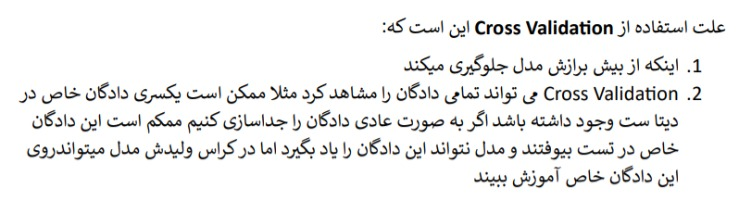

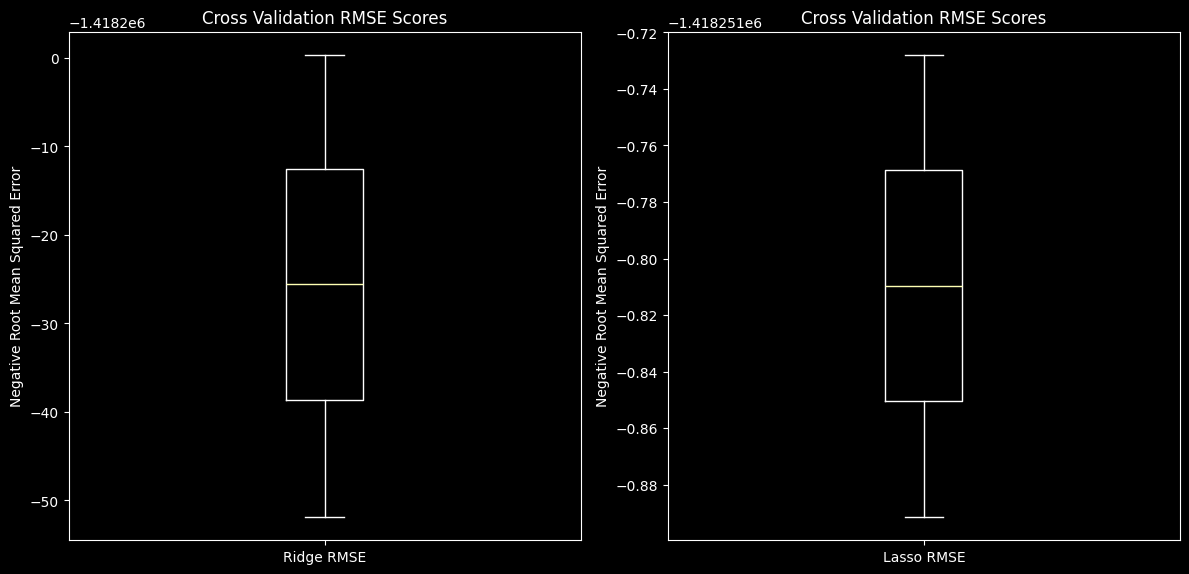

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy cross-validation results for Ridge and Lasso regression
# These results are assumed for demonstration purposes
# Usually, these would be obtained from the 'cv_results_' attribute of GridSearchCV results

# For Ridge regression with RMSE
ridge_rmse_scores = results_ridge_rmse.cv_results_['mean_test_score']

# For Lasso regression with RMSE
lasso_rmse_scores = results_lasso_rmse.cv_results_['mean_test_score']

# For Ridge regression with R2 score
ridge_r2_scores = results_ridge_r2.cv_results_['mean_test_score']

# For Lasso regression with R2 score
lasso_r2_scores = results_lasso_r2.cv_results_['mean_test_score']

# Create a figure and a set of subplots
fig1, axs1 = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for RMSE scores on Ridge
axs1[0].boxplot([ridge_rmse_scores], labels=['Ridge RMSE'])
axs1[0].set_title('Cross Validation RMSE Scores')
axs1[0].set_ylabel('Negative Root Mean Squared Error')

# Boxplot for RMSE scores on Lasso
axs1[1].boxplot([lasso_rmse_scores], labels=['Lasso RMSE'])
axs1[1].set_title('Cross Validation RMSE Scores')
axs1[1].set_ylabel('Negative Root Mean Squared Error')

# Adjust layout
plt.tight_layout()
plt.show()

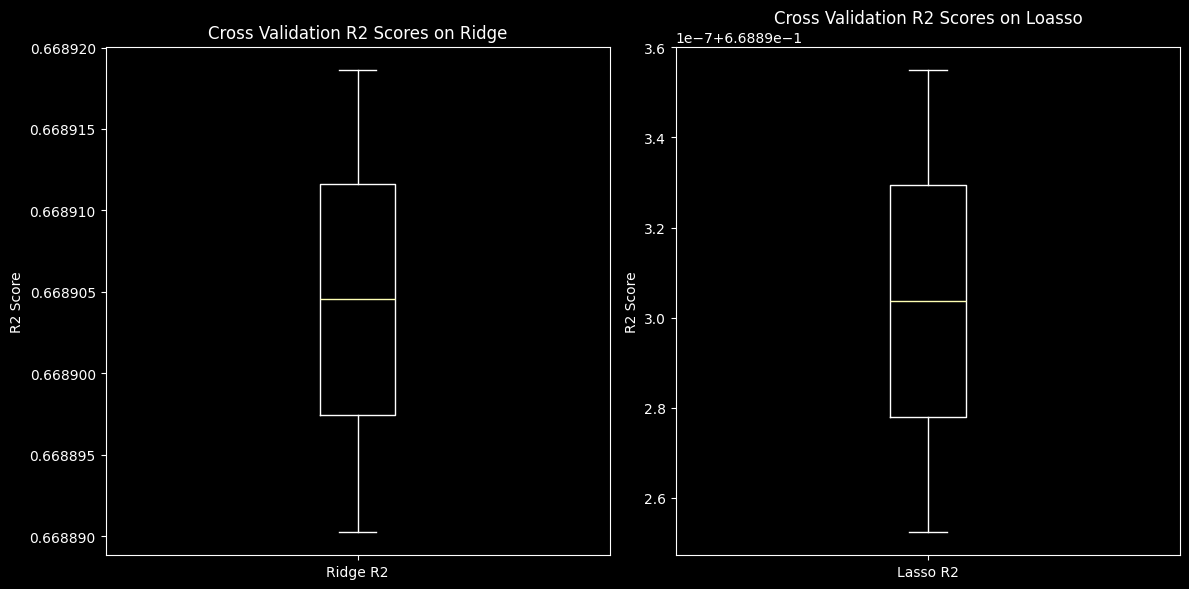

In [84]:
# Create a figure and a set of subplots
fig2, axs2 = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for R2 scores on Rdige
axs2[0].boxplot([ridge_r2_scores], labels=['Ridge R2'])
axs2[0].set_title('Cross Validation R2 Scores on Ridge')
axs2[0].set_ylabel('R2 Score')

# Boxplot for R2 scores on Lasso
axs2[1].boxplot([lasso_r2_scores], labels=['Lasso R2'])
axs2[1].set_title('Cross Validation R2 Scores on Loasso')
axs2[1].set_ylabel('R2 Score')


# Adjust layout
plt.tight_layout()
plt.show()

# Quesion 7

### Preprocess on test data
1. fill nan
2. label encoding

In [53]:
np.sum(test_car.isnull())

C:\Users\RP.co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                29
Max Power             29
Max Torque            29
Length                27
Width                 27
Height                27
Seating Capacity      27
Fuel Tank Capacity    36
dtype: int64

In [54]:
# For test Data on numerical data
test_data = test_car.copy()
proceed_num_test = numerical_fill_nan(test_data)
proceed_num_test_plus_features = add_numerical_feature(proceed_num_test)

proceed_num_cat_test =  proceed_num_test_plus_features.copy()
# preform label Encoding on some categorical feature on test dataset
proceed_num_cat_test['Make']= label_encoder.fit_transform(proceed_num_cat_test['Make'])
proceed_num_cat_test['Model']= label_encoder.fit_transform(proceed_num_cat_test['Model'])
proceed_num_cat_test['Fuel Type']= label_encoder.fit_transform(proceed_num_cat_test['Fuel Type'])
proceed_num_cat_test['Transmission']= label_encoder.fit_transform(proceed_num_cat_test['Transmission'])
proceed_num_cat_test['Location']= label_encoder.fit_transform(proceed_num_cat_test['Location'])
proceed_num_cat_test['Color']= label_encoder.fit_transform(proceed_num_cat_test['Color'])
proceed_num_cat_test['Owner']= label_encoder.fit_transform(proceed_num_cat_test['Owner'])
proceed_num_cat_test['Seller Type']= label_encoder.fit_transform(proceed_num_cat_test['Seller Type'])

proceed_num_cat_test.head()

C:\Users\RP.co\AppData\Local\Temp\ipykernel_3612\3328407980.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data["Max Torque"].fillna(method='ffill', inplace=True)
C:\Users\RP.co\AppData\Local\Temp\ipykernel_3612\3328407980.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data["Max Power"].fillna(method='ffill', inplace=True)
C:\Users\RP.co\AppData\Local\Temp\ipykernel_3612\3328407980.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data["Seating Capacity"].fillna(method='ffill', inplace=True)
C:\Users\RP.co\AppData\Local\Temp\ipykernel_3612\3328407980.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_dat

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,level_1,Engine,Max_Power_bhp,Max_Power_rpm
200,15,229,20000000,2021,6600,3,0,13,15,0,2,5246.0,1899.0,1494.0,5.0,80.0,0,1950,362.0,5250.0
68,15,228,5500000,2015,54000,1,0,15,15,0,2,5246.0,1899.0,1494.0,5.0,70.0,0,1950,255.0,3600.0
511,1,9,3200000,2014,133273,1,0,41,2,0,2,5219.0,1902.0,1481.0,4.0,70.0,0,1995,258.0,4000.0
183,15,155,5950000,2017,80000,3,0,13,1,0,2,5130.0,1934.0,1850.0,5.0,100.0,0,1950,329.0,5250.0
274,15,154,6875000,2019,53000,1,0,12,15,0,2,5130.0,1934.0,1850.0,7.0,100.0,0,1950,255.0,3400.0


### 2. Prediction test data

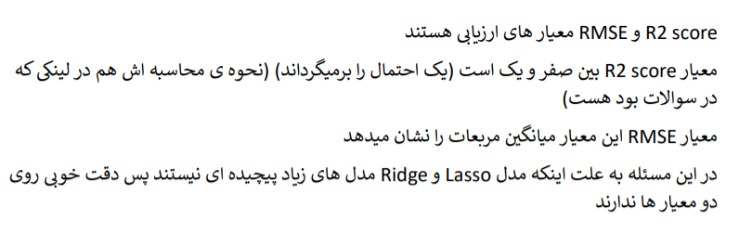

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# drop Max_Power_rpm because we drop it from train data
proceed_num_cat_test.drop('Max_Power_rpm', axis=1, inplace=True)


X_test = proceed_num_cat_test.drop('Price', axis=1)
y_test = proceed_num_cat_test["Price"]
X_test.head()

# Ridge model
model_ridge = Ridge(alpha=0.99)
model_ridge.fit(X, y)
y_pred_ridge = model_ridge.predict(X_test)

# Lasso model
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(X, y)
y_pred_lasso = model_lasso.predict(X_test)

print("Ridge -------------------------------")
print("RMSE on test dataset: ", math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R2 Score on test dataset: ", math.sqrt(r2_score(y_test, y_pred_ridge)))
print()
print("Lasso -------------------------------")
print("RMSE on test dataset: ", math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R2 Score on test dataset: ", math.sqrt(r2_score(y_test, y_pred_lasso)))

Ridge -------------------------------
RMSE on test dataset:  1737041.86499001
R2 Score on test dataset:  0.6848553320258232

Lasso -------------------------------
RMSE on test dataset:  1737081.340127455
R2 Score on test dataset:  0.6848377123616948
